In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv('ATLAS_LC/signatures_8_encoded.csv')

In [5]:
encod_cols = [col for col in data.columns if 'encode' in col]

In [12]:
test_set = data.sample(5000)

In [17]:
t = TSNE(n_components=2, perplexity=100, learning_rate=50, early_exaggeration=200)
embed = t.fit_transform(test_set[encod_cols].values)

In [18]:
embed.shape

(5000, 2)

In [19]:
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

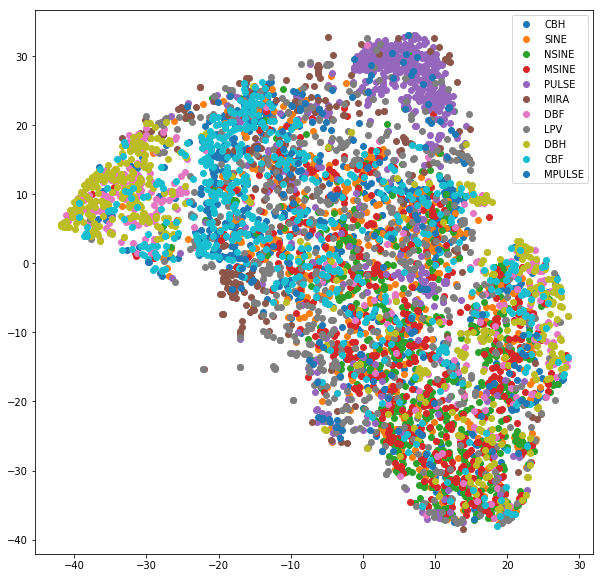

In [20]:
plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()